In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [3]:
#Base dataset path
dataset_path = 'dataset'

#Subfolders
train_path = os.path.join(dataset_path, 'BT_traning')
val_path = os.path.join(dataset_path, 'BT_validation')
test_path = os.path.join(dataset_path, 'BT_testing')

#Classes
classes = ["Tumor", "No_Tumor"]

In [4]:
def count_images(path, classes):
    for cls in classes:
        class_path = os.path.join(path, cls)
        print(f"{cls}: {len(os.listdir(class_path))} images")

print("Training set:")
count_images(train_path, classes)

print("\nValidation set:")
count_images(val_path, classes)

print("\nTesting set:")
count_images(test_path, classes)

Training set:
Tumor: 76 images
No_Tumor: 76 images

Validation set:
Tumor: 10 images
No_Tumor: 10 images

Testing set:
Tumor: 10 images
No_Tumor: 10 images


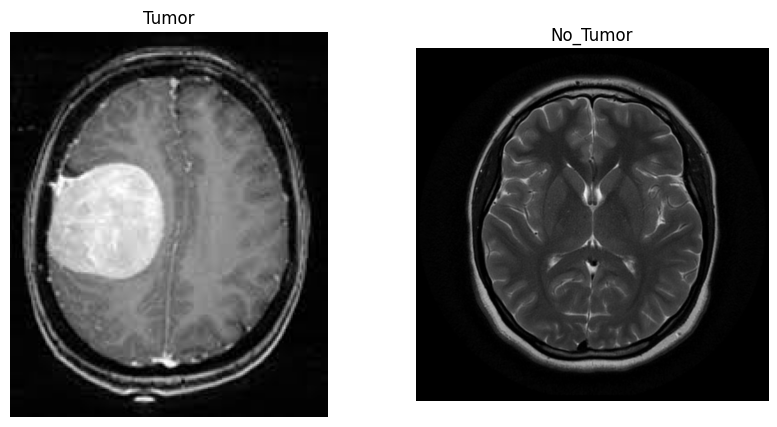

In [5]:
plt.figure(figsize=(10,5))
for i, cls in enumerate(classes):
    img_path = os.path.join(train_path, cls, os.listdir(os.path.join(train_path, cls))[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

In [6]:
def check_shapes(path, classes):
    for cls in classes:
        class_path = os.path.join(path, cls)
        shapes = [cv2.imread(os.path.join(class_path, img)).shape for img in os.listdir(class_path)]
        print(f"{cls} image shapes: {set(shapes)}\n")
        
check_shapes(train_path, classes)

Tumor image shapes: {(349, 300, 3), (233, 215, 3), (520, 433, 3), (620, 620, 3), (365, 306, 3), (354, 279, 3), (210, 200, 3), (300, 289, 3), (350, 315, 3), (243, 205, 3), (630, 628, 3), (225, 225, 3), (338, 264, 3), (337, 293, 3), (286, 241, 3), (431, 400, 3), (340, 291, 3), (212, 209, 3), (369, 400, 3), (630, 630, 3), (300, 240, 3), (294, 250, 3), (929, 634, 3), (360, 313, 3), (218, 180, 3), (219, 230, 3), (255, 197, 3), (355, 320, 3), (442, 353, 3), (234, 216, 3), (251, 204, 3), (555, 526, 3), (512, 512, 3), (340, 288, 3), (290, 250, 3), (1024, 1024, 3), (630, 504, 3), (519, 456, 3), (239, 211, 3), (359, 297, 3), (1427, 1275, 3), (325, 254, 3), (380, 310, 3), (247, 204, 3), (270, 229, 3), (340, 314, 3), (251, 201, 3), (353, 300, 3), (307, 271, 3), (308, 244, 3), (360, 319, 3), (350, 272, 3), (277, 272, 3), (278, 236, 3), (325, 300, 3), (500, 377, 3), (938, 911, 3), (456, 374, 3), (223, 226, 3), (446, 450, 3), (380, 294, 3)}

No_Tumor image shapes: {(168, 300, 3), (264, 210, 3), (1080

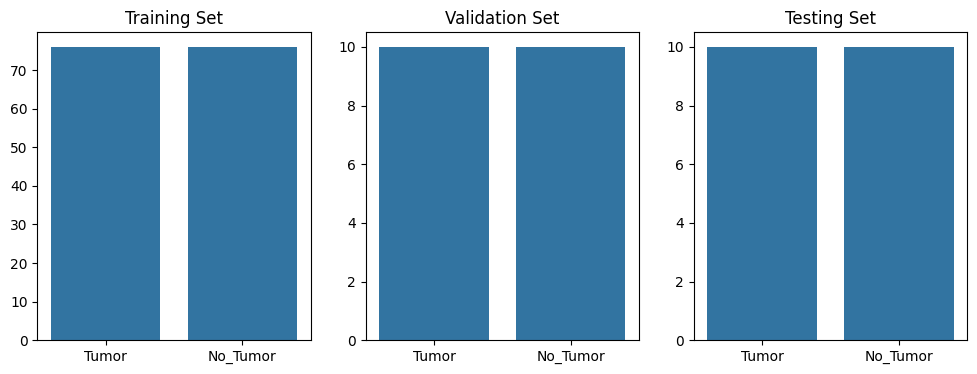

In [7]:
train_counts = [len(os.listdir(os.path.join(train_path, cls))) for cls in classes]
val_counts = [len(os.listdir(os.path.join(val_path, cls))) for cls in classes]
test_counts = [len(os.listdir(os.path.join(test_path, cls))) for cls in classes]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=classes, y=train_counts)
plt.title('Training Set')

plt.subplot(1, 3, 2)
sns.barplot(x=classes, y=val_counts)
plt.title('Validation Set')

plt.subplot(1, 3, 3)
sns.barplot(x=classes, y=test_counts)
plt.title('Testing Set')

plt.show()

In [8]:
#Image size for CNN input
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

#Date generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Load images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 152 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Custom CNN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN architecture
model = Sequential([
    # Convolutional + Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Summary
model.summary()

c:\Users\LOQ\Downloads\projects\python\brain_tumor\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Number of epochs
EPOCHS = 15

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=EPOCHS
)

c:\Users\LOQ\Downloads\projects\python\brain_tumor\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.4917 - loss: 1.2485 - val_accuracy: 0.6000 - val_loss: 0.6314
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6250 - loss: 0.6538 - val_accuracy: 0.5000 - val_loss: 0.6446
Epoch 3/15


c:\Users\LOQ\Downloads\projects\python\brain_tumor\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.5667 - loss: 0.6777 - val_accuracy: 0.7500 - val_loss: 0.6367
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5938 - loss: 0.6940 - val_accuracy: 0.8000 - val_loss: 0.6305
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.6797 - loss: 0.6459 - val_accuracy: 0.7000 - val_loss: 0.6273
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5417 - loss: 0.6915 - val_accuracy: 0.7500 - val_loss: 0.5480
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.7422 - loss: 0.6070 - val_accuracy: 0.7500 - val_loss: 0.4912
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.5783 - val_accuracy: 0.8000 - val_loss: 0.5531
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.6667 - loss: 0.5651 - val_accuracy: 0.8000 - val_loss: 0.4772
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6562 - loss: 0.5560 - val_accuracy: 0.8000 - val_loss: 0.4802
Epoch 

In [11]:
#Evaluate on test data
test_loss, test_acc = model.evaluate(
    test_generator, 
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7500 - loss: 0.6811
Test Accuracy: 75.00%
Test Loss: 0.6811


In [12]:
model.save("brain_tumor_custom_cnn.keras")


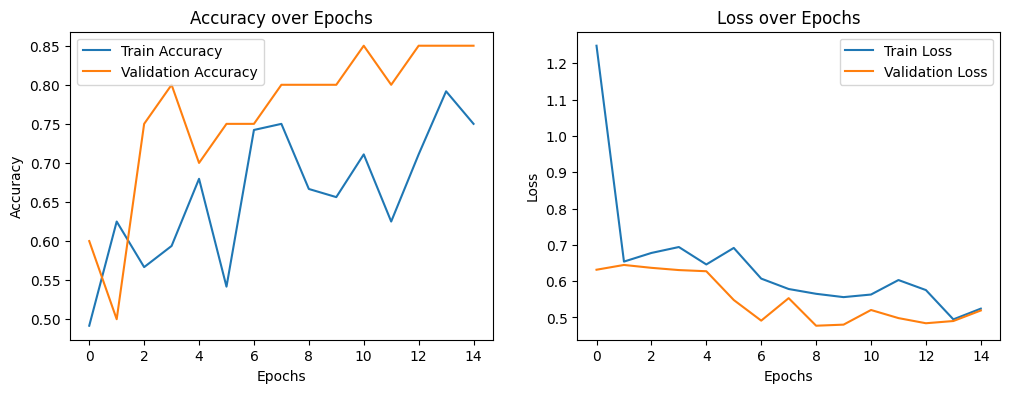

In [15]:
#Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##  Pre Trained model

In [16]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers so they don't train
for layer in base_model.layers:
    layer.trainable = False
    
#Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

#Build final model
model = Model(inputs=base_model.input, outputs=output)

#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#Summary
model.summary()

#Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4868 - loss: 1.1260 - val_accuracy: 0.5000 - val_loss: 0.7688
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 693ms/step - accuracy: 0.5132 - loss: 0.8702 - val_accuracy: 0.5000 - val_loss: 0.6977
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 679ms/step - accuracy: 0.5329 - loss: 0.7438 - val_accuracy: 0.5000 - val_loss: 0.7078
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 682ms/step - accuracy: 0.5066 - loss: 0.7524 - val_accuracy: 0.5000 - val_loss: 0.7289
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - accuracy: 0.4934 - loss: 0.8313 - val_accuracy: 0.5000 - val_loss: 0.7362
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 699ms/step - accuracy: 0.5066 - loss: 0.7709 - val_accuracy: 0.5000 - val_loss: 0.7229
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - accuracy: 0.4539 - loss: 0.8036 - val_accuracy: 0.5000 - val_loss: 0.6969
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step - accuracy: 0.5197 - loss: 0.7713 - val_accuracy: 0.5000 - val_loss: 0.

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.5000 - loss: 0.7481
Test Accuracy: 50.00%


In [18]:
model.save("brain_tumor_resnet_or_efficientnet.keras")


## Comparision

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [20]:
custom_model = load_model("brain_tumor_custom_cnn.keras")
pretrained_model = load_model("brain_tumor_resnet_or_efficientnet.keras")

In [21]:
#test dataset path
test_path = 'dataset/BT_testing'

#Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

#Test data generator (no augmentation, only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 20 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


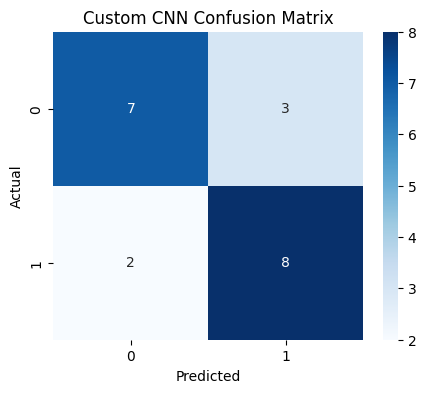

Custom CNN Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.78      0.70      0.74        10
       Tumor       0.73      0.80      0.76        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



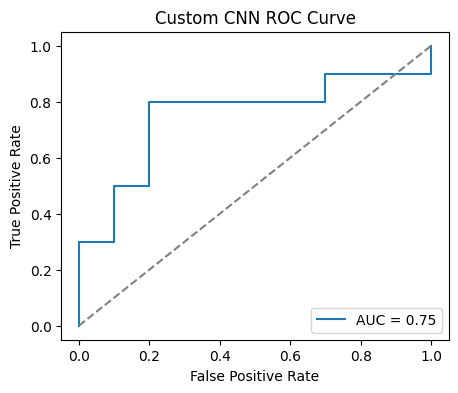

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


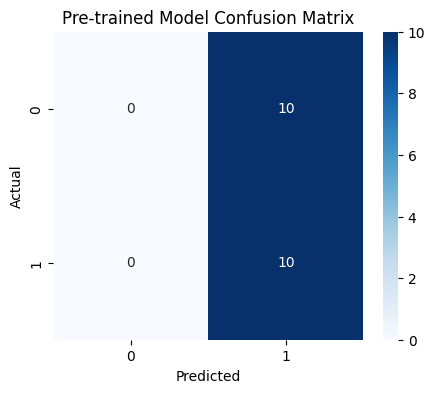

Pre-trained Model Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.00      0.00      0.00        10
       Tumor       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



c:\Users\LOQ\Downloads\projects\python\brain_tumor\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LOQ\Downloads\projects\python\brain_tumor\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LOQ\Downloads\projects\python\brain_tumor\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

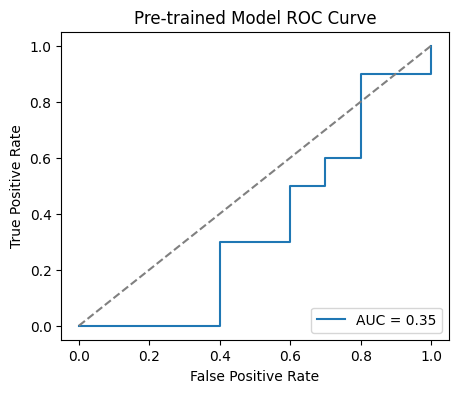

In [22]:
#Function to evaluate model
def evaluate_model(model, generator, model_name="Model"):
    #Predictions
    preds = model.predict(generator)
    y_pred = np.where(preds > 0.5, 1, 0)
    y_true = generator.classes
    
    #Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"]))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return cm, roc_auc

# Evaluate Custom CNN
cm_custom, auc_custom = evaluate_model(custom_model, test_generator, model_name="Custom CNN")

# Evaluate Pretrained Model
cm_pretrained, auc_pretrained = evaluate_model(pretrained_model, test_generator, model_name="Pre-trained Model")

## Visualise coorect and incorrect prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Custom CNN - Correct Predictions: 200 / 20
Custom CNN - Incorrect Predictions: 200 / 20


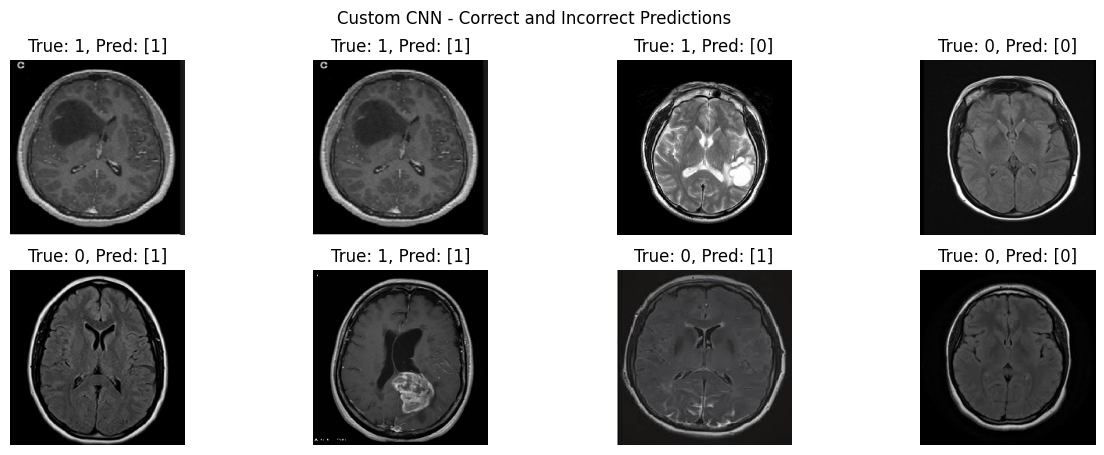

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
Pre-trained Model - Correct Predictions: 200 / 20
Pre-trained Model - Incorrect Predictions: 200 / 20


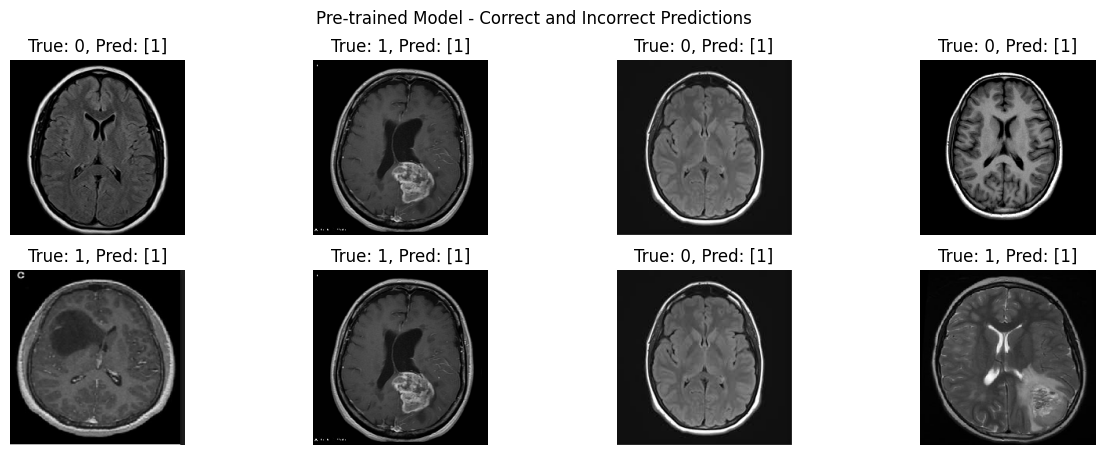

In [23]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_predictions(model, generator, model_name="Model", num_images=8):
    preds = model.predict(generator)
    y_pred = np.where(preds > 0.5, 1, 0)
    y_true = generator.classes
    flie_paths = generator.filepaths
    
    correct_idx = np.where(y_pred == y_true)[0]
    incorrect_idx = np.where(y_pred != y_true)[0]
    
    print(f"{model_name} - Correct Predictions: {len(correct_idx)} / {len(y_true)}")
    print(f"{model_name} - Incorrect Predictions: {len(incorrect_idx)} / {len(y_true)}")
    
    # Show some correct predictions
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(random.sample(list(correct_idx), min(num_images//2, len(correct_idx)))):
        img = load_img(flie_paths[idx], target_size=(224, 224))
        plt.subplot(2, num_images//2, i+1)
        plt.imshow(img)
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
        
    # Show some incorrect predictions
    for i, idx in enumerate(random.sample(list(incorrect_idx), min(num_images//2, len(incorrect_idx)))):
        img = load_img(flie_paths[idx], target_size=(224, 224))
        plt.subplot(2, num_images//2, i + 1 + num_images//2)
        plt.imshow(img)
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
        
    plt.suptitle(f"{model_name} - Correct and Incorrect Predictions")
    plt.show()
    
# Visualize for Custom CNN
visualize_predictions(custom_model, test_generator, model_name="Custom CNN")

# Visualize for Pretrained Model
visualize_predictions(pretrained_model, test_generator, model_name="Pre-trained Model")